In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [32]:
imgr = mpimg.imread('test.jpg')

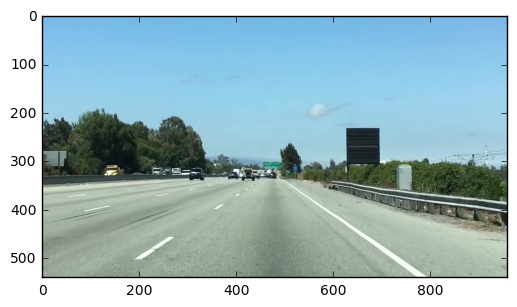

In [33]:
plt.imshow(imgr)

In [34]:
xsize = imgr.shape[0]
ysize = imgr.shape[1]
print ("x:y = {}:{}".format(xsize,ysize))

x:y = 540:960


In [35]:
color_select = np.copy(imgr)
line_image = np.copy(imgr)

In [36]:
red_threshold =200
blue_threshold = 100
green_threshold =100
rgb_threshold =[red_threshold,green_threshold,blue_threshold]

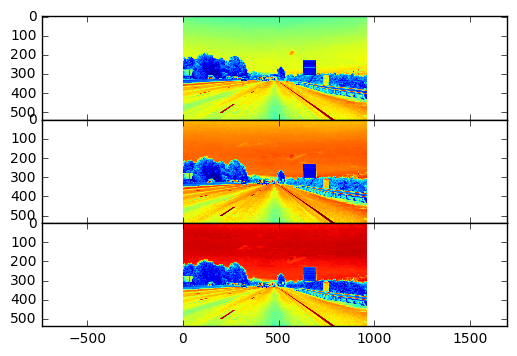

In [37]:

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.imshow(imgr[:,:,0])
ax2.imshow(imgr[:,:,1])
ax3.imshow(imgr[:,:,2])
f.subplots_adjust(hspace=0)


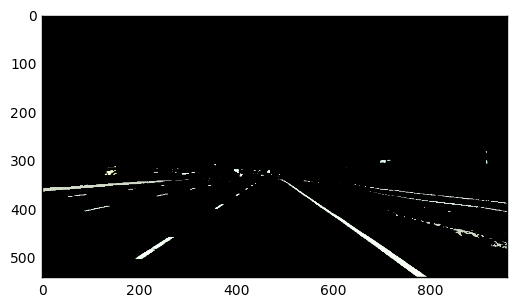

In [38]:
color_thresholds = (imgr[:,:,0] < rgb_threshold[0]) \
            | (imgr[:,:,1] < rgb_threshold[1]) \
            | (imgr[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image                 
plt.imshow(color_select)
plt.show()

In [39]:
print color_select.shape

(540, 960, 3)


In [40]:

left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

In [41]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [42]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

line_image[~color_thresholds & region_thresholds] = [255,0,0]
# Display the image
plt.imshow(color_select)
plt.imshow(line_image)

ValueError: operands could not be broadcast together with shapes (540,960) (960,540) 